# LayeredTreeDraw

In [50]:
from pygraphml import GraphMLParser
from matplotlib import pyplot as plt
%matplotlib inline

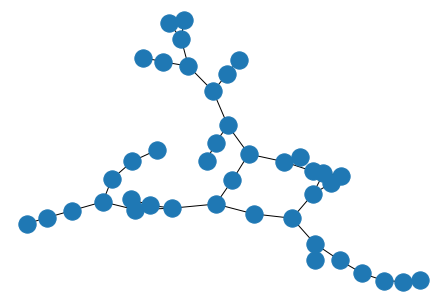

In [51]:
file_list = ["tree1.xml", "tree2.xml", "tree3.xml", "tree4.xml",]
graphs = [GraphMLParser().parse("data/" + file_name) for file_name in file_list]
graphs[0].show()

In [67]:
class LayeredTreeDraw:
    def __init__(self, graph):
        self.graph = graph
        self.root = self.graph.nodes()[0]
        self.counter = 0
        
        
    def draw(self, save: bool = False, file: str = None):
        self.counter = 0
        self.visit(self.root, 0)
        self.show_graph(save, file)            

        
    def mark(self, node, x, y):
        node.x = x
        node.y = y
        
        
    def shift_graph(self, root, diff: int):
        self.mark(root, root.x - diff, root.y)
        for root in root.children():
            self.shift_graph(root, diff)
            
            
    def shift_contour(self, contour: dict, diff: int):
        new_contour = dict()
        for key, value in contour.items():
            new_contour[key] = [value[0] - diff, value[1]]
        return new_contour
    
    
    def get_diff_bitween_contours(self, left: dict, right: dict):
        min_d = min(left.keys())
        max_d = min(max(left.keys()), max(right.keys()))

        min_diff = None
        for d in range(min_d, max_d + 1):
            cur_diff = right[d][0] - left[d][1]
            min_diff = min(min_diff, cur_diff) if min_diff else cur_diff

        return min_diff
    
    
    def union_contours(self, left: dict, right: dict):
        res = right.copy()
        for key, value in left.items():
            if key not in res:
                res[key] = value
            else:
                right_value = res[key]
                left_value = value
                res[key] = [min(right_value[0], left_value[0]), max(right_value[1], left_value[1])]
        return res
    
    
    def visit(self, node, d):
        contour = {}
        children = node.children()

        if len(children) == 2:
            contour_left = self.visit(children[0], d+1)
            self.counter += 1
            contour_right = self.visit(children[1], d+1)
            
            diff = self.get_diff_bitween_contours(contour_left, contour_right)
            
            self.shift_graph(children[1], diff - 1)
            contour_right = self.shift_contour(contour_right, diff - 1)
            
            self.mark(node, (children[0].x + children[1].x) // 2, d)
            
            contour = self.union_contours(contour_left, contour_right)

        elif len(children) == 1:
            contour_left = self.visit(children[0], d+1)
            self.mark(node, children[0].x, d)
            contour = contour_left
        else:
            self.mark(node, self.counter, d)
        
        
        contour[d] = [node.x, node.x]    

        return contour

    
    def show_graph(self, save: bool = False, file: str = None):
        fig, ax = plt.subplots(figsize=(10, 10))

        for node in self.graph.nodes():
            ax.scatter(node.x, node.y, s=100, c="b")
            ax.annotate(node.id, (node.x, node.y), fontsize=12)

            children = node.children()

            if len(children) == 2:
                left = children[0]
                right = children[1]
                ax.plot([node.x, left.x], [node.y, left.y], '-b')
                ax.plot([node.x, right.x], [node.y, right.y], '-b')

            elif len(children) == 1:
                left = children[0]
                ax.plot([node.x, left.x], [node.y, left.y], '-b')

        ax.invert_yaxis()
        if save:
            plt.savefig(file)
        plt.show()

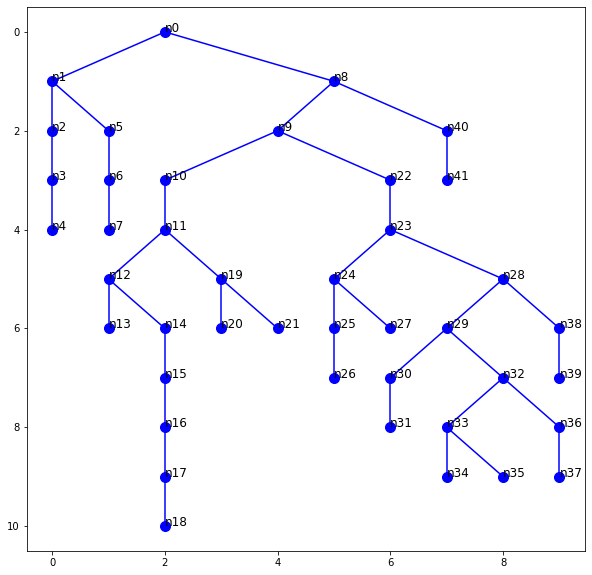

In [68]:
LTD = LayeredTreeDraw(graphs[0])
LTD.draw(save=True, file="tree.png")